In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import warnings
import scipy
from simulation_data import get
from velocity.velocity_data import star_pos_vel
from velocity.velocity_data import get_ellipticity
from velocity.velocity_data import rotational_data
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data

In [7]:
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f:
    print(f.keys())
    
    #ids = f['ids'][:]
    #median_age = f['median_age'][:]
    #halfmass_radius = f['halfmass_radius'][:]
    #total_mass = f['total_mass'][:]
    #newbin_current_SFR = f['newbin_current_SFR'][:]
    #maximum_merger_ratio_30kpc_current_fraction = f['maximum_merger_ratio_30kpc_current_fraction'][:]
    #lam = f['lam'][:]
    #bulge_ratio = f['bulge_ratio'][:]

<KeysViewHDF5 []>


In [3]:
warnings.filterwarnings('ignore')

PSB_selection = (median_age<=1.2)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
intermediate_quiescent_selection = (median_age>1.2)&(median_age<=1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
old_quiescent_selection = (median_age>1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
starforming_selection = (np.log10(newbin_current_SFR/10**(total_mass))>-10.5)

lambda vs epsilon

In [11]:
i_list = [0,2,6]
lam_plt = []
eps_plt = []

[False False False ... False False False]


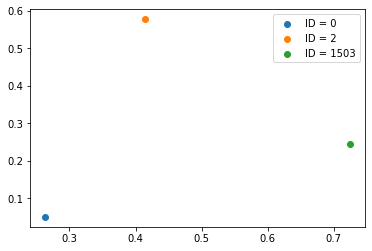

In [9]:
for i in i_list:
    id = ids[i]
    pos,vel_raw,star_masses,cor_pos = star_pos_vel(id)
    r, vel_circ, v_r, r_v_r, lam, bins, mass_num, vel, radius, v_phi,lambda_obs = rotational_data(id,'')
    cov  = np.cov(cor_pos.T)
    w, v = la.eig(cov)
    minor = np.min(np.float32(w))
    major = np.max(np.float32(w))
    ellipticity = 1.0-minor/major
    plt.scatter(ellipticity,lambda_obs, label = "ID = " + str(id))
    plt.legend()
    lam_plt.append(lam)
    eps_plt.append(ellipticity)

<KeysViewHDF5 []>
